<img src='./images/GOES16.jpg' width=200 align='right' style='padding-left:30px'> <img src='./images/HRRR.png' width=288 align='right' style='padding-left:30px'>

**November 15, 2018**  
**ATMOS 5020: Environmental Programming**  
**John Horel & Brian Blaylock**

# 2-Dimensional Plots in `matplotlib`

To start off, become familiar with a few basic methods for plotting 2D data. Practice with a small 2D array of random data.
Search the `matplolib` documents for more information.

Reference: [numpy.random.random](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)

In [323]:
import numpy as np
import matplotlib.pyplot as plt

In [324]:
# Generate some random 2D data (random numbers between 0 and 1)
R = np.random.random([5,5])

print(np.shape(R))
print(R)

(5, 5)
[[0.4163098  0.40094495 0.10701157 0.38315662 0.70137265]
 [0.98131657 0.00587407 0.11492175 0.01375156 0.1737118 ]
 [0.06520922 0.33626217 0.90511119 0.64171229 0.39206774]
 [0.09353774 0.89705627 0.56823134 0.8424747  0.242937  ]
 [0.31874692 0.77595191 0.66458784 0.54758213 0.00184672]]


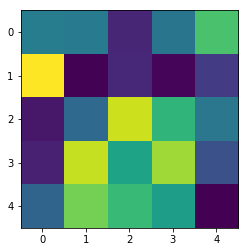

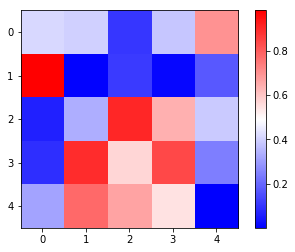

In [325]:
# Plot data with plt.imshow()
plt.figure(1)
plt.imshow(R)

# Use a different color map and add a colorbar
plt.figure(2)
plt.imshow(R, cmap='bwr')
plt.colorbar()

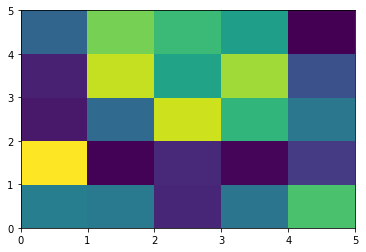

In [326]:
# Plot data with pcolormesh
plt.pcolormesh(R)

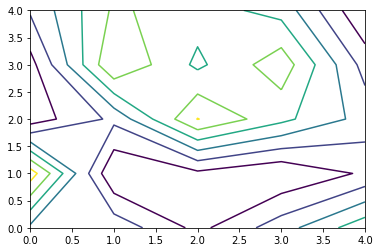

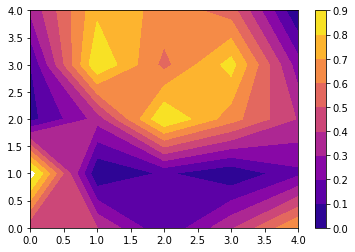

In [327]:
# Plot data with contours
plt.figure(1)
plt.contour(R)

# Color fill for specific levels and add a colorbar
plt.figure(2)
plt.contourf(R, levels=np.arange(0,1,.1), cmap='plasma')
plt.colorbar()

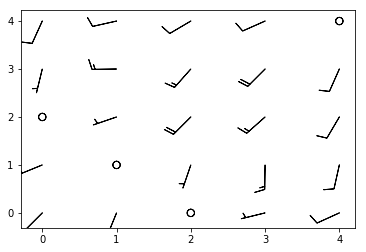

In [328]:
# Wind barbs (U and V compoents)
plt.barbs(R*15, np.transpose(R*15))

---

# Visualizing Geospatial Data

The objective of this class is to introduce you to some geospatial datasets used in atmospheric science and how to visualize those datasets in Python with `matplotlib`. The data we will look at is from 10 October 2018, during hurricane Michael.

#### GOES-16 (GOES-East) Satellite
Geostationary satellites observe weather on earth ~35,000 km (22,000 miles) away. The [GOES-R](https://www.goes-r.gov/) satellite series is arguably one of the most exciting weather-observing platforms ever made. GOES-16 was made operational last year and is also known as GOES-East. GOES-17 is expected to become operational in a few months and will be named GOES-West.
- Measures light in 16 different wavelengths between 0.47 &#181;m to 13.3 &#181;m (visible, near-infrared, infrared).
- ~2 km grid spacing
- Produces images of the contiguous United States every 5 minutes
- View data here: http://rammb-slider.cira.colostate.edu

#### High-Resolution Rapid Refresh model (HRRR)
The [HRRR model](https://rapidrefresh.noaa.gov/hrrr/) is the highest resolution model run operationaly in the United States.
- Many meteorological outputs including temperautre, wind, humidity, pressure, simulated radar reflectivity, etc.
- 3 km grid spacing
- Produces 18-hr forecasts every hour.
- View data here: https://rapidrefresh.noaa.gov/hrrr/HRRR/Welcome.cgi?dsKey=hrrr_ncep_jet


# Download notebook and data
Download this notebook and all the data from github. In the terminal, change the the desktop directory `cd Desktop/` and then type:

    git clone https://github.com/johnhorel/ATMOS_5020_2018.git
    
Look at the contents of the `data` directory.

Many meteorological datasets are stored in a format known as NetCDF or GRIB2. Since the Marriott Library computers do not have NetCDF or GRIB2 file readers installed, I saved the data as a Numpy Binary files `.npy`. This way you don't have to worry about reading and loading data files. During this exercise, **focus on Matplotlib's plotting capabilities.**


#### How to load a `.npy` file. 
The data is saved in the `.npy` files are dictionaries. You can load the dictionary from the file as follows:

    a = np.load('PATH/NAME.ipy').item()
   
1. To look at the contents of the dictionary, print the variable it was saved to:
    - `print(a)`
1. To look at just the keys of the dictionary: 
    - `print(a.keys())`
1. To retrieve the values stored in a key:
    - `b = a['KEY NAME']`

---

---

# GOES-16 Sattelite Data: Hurricane Michael

The GOES-16 Advanced Baseline Imager (ABI) is a passive sensor that measures 16 different wavelengths of light. Every 5 minutes, the satellite produces a new image of the contiguous United States for each of the 16 wavelengths. 

Look at the [ABI Reference Guide](https://www.goes-r.gov/education/ABI-bands-quick-info.html) for more information about what each channel observes. 

![](./images/GOES-wavelengths.png)

Each wavelength is called a "channel" and each channel is stored as a different file. For example: `GOES_ABI_20181010-1438_C02.npy` is the GOES ABI dataset from 2018 Oct 10 at 14:32 UTC for Channel 2.

In [152]:
# Load channel dictionary
channel_02 = np.load('./data/GOES_ABI_20181010-1438_C02.npy').item()

In [153]:
# What is the contents of the dictionary?
channel_02

{'wavelength': 0.64,
 'data': array([[       nan,        nan,        nan, ..., 0.48476145, 0.47174558,
         0.50507885],
        [       nan,        nan,        nan, ..., 0.44888845, 0.4088885 ,
         0.4469837 ],
        [       nan,        nan,        nan, ..., 0.45047575, 0.45523766,
         0.42507896],
        ...,
        [0.0380952 , 0.03555552, 0.03396822, ..., 0.03873012, 0.03904758,
         0.03619044],
        [0.0365079 , 0.03555552, 0.03301584, ..., 0.0412698 , 0.03428568,
         0.03396822],
        [0.04031742, 0.03999996, 0.03301584, ..., 0.03777774, 0.03587298,
         0.0333333 ]], dtype=float32),
 'units': '1',
 'long name': 'ABI Cloud and Moisture Imagery reflectance factor',
 'standard name': 'toa_lambertian_equivalent_albedo_multiplied_by_cosine_solar_zenith_angle',
 'DATE': '2018-10-10 14:38:38'}

In [154]:
# What are the dictionary keys?
channel_02.keys()

dict_keys(['wavelength', 'data', 'units', 'long name', 'standard name', 'DATE'])

In [233]:
# What is the value stored in 'long name'?
channel_02['long name']

'ABI Cloud and Moisture Imagery reflectance factor'

In [234]:
# What is the array shape of the data?
np.shape(channel_02['data'])

(1500, 2500)

#### Plot image with `imshow()`

We have loaded the file contents for **Channel 02**, which is the visible red light measureed at 0.64 &#181;m. Plot the data with a matplotlib function [`imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html).

Text(1,1,'Wavelength: 0.64 um')

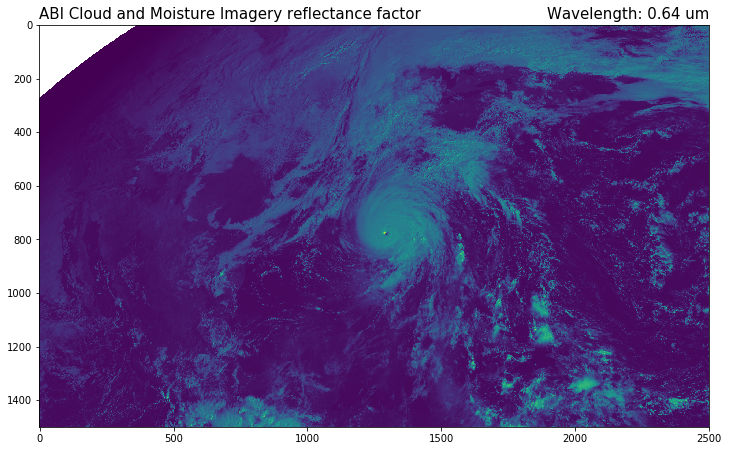

In [232]:
# Set the figure size
plt.figure(figsize=[12,10])

# Plot the channel's data as an image
plt.imshow(channel_02['data'])

# Modify the 
plt.title(channel_02['long name'], fontsize=15, loc='left')
plt.title("Wavelength: %s um" % channel_02['wavelength'], fontsize=15, loc='right')

You might not like the default colorscale. There are [others you can choose](https://matplotlib.org/examples/color/colormaps_reference.html) using the `cmap=` argument.

Often, single-channel satellite images are displayed in greyscale. This looks much better...

Text(1,1,'Band 1')

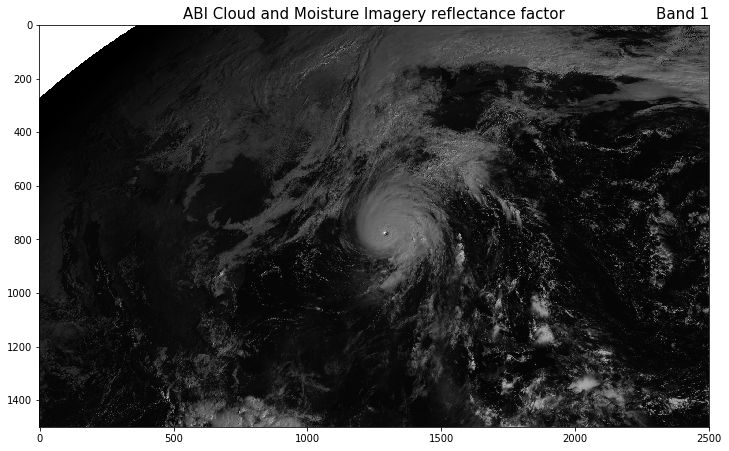

In [235]:
plt.figure(figsize=[12,10])

plt.imshow(channel01['data'], cmap='gray')

plt.title(channel01['long_name'], fontsize=15)
plt.title("Band 1", fontsize=15, loc='right')

> ## Question
> What is the white area in the top left corner?


# Color Images (RGB)
Color images on a screen are made of _Red_, _Green_, and _Blue_ light (RGB). If you don't believe me, check out this video: https://youtu.be/3BJU2drrtCM?t=446. Do you remember the [color picker](https://www.google.com/search?q=color+picker) used when custamizing colors on your HTML page? When RGB values are the same, e.g. `RGB=(90, 90, 90)`, you get a shade of grey.

<img src="./images/rgb.png" width=150px, align='right'>

Since satelites measure different wavelengths of light, an RGB combination of three different channels will produce a color image. The trick is, knowing which channel to set as the R, G, and B values.

Instead of giving `imshow()` a single 2-d array, we can "stack" the different channels in the order R, G, B.

When the R, G, and B values are the same, you get shades of grey, like the grey-scale image shown below. This is becuase channel `01` are assigned to the R, G, and B value. Color images are generated when RGB are different. 

> #### Question: What combination of ABI channels will create a "true color" image?
> Channels 1 and 2 are visible channels. Channel 3 is a near infrared sensitive to vegetation. Experiment with different channel combinations to generate an RGB Image that resenmbles what you would expect to "see" from a satellite.
>
    # instead of xx, insert 01, 02, or 03
    R = GOES_ABI_20181010-1437_Cxx.npy 
    G = GOES_ABI_20181010-1437_Cxx.npy  
    B = GOES_ABI_20181010-1437_Cxx.npy

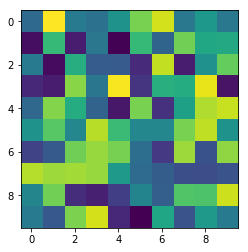

In [240]:
plt.imshow(np.random.random([10,10]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


R: ABI Cloud and Moisture Imagery reflectance factor 0.64 um 	Units: 1
G: ABI Cloud and Moisture Imagery reflectance factor 0.865 um 	Units: 1
B: ABI Cloud and Moisture Imagery reflectance factor 0.47 um 	Units: 1


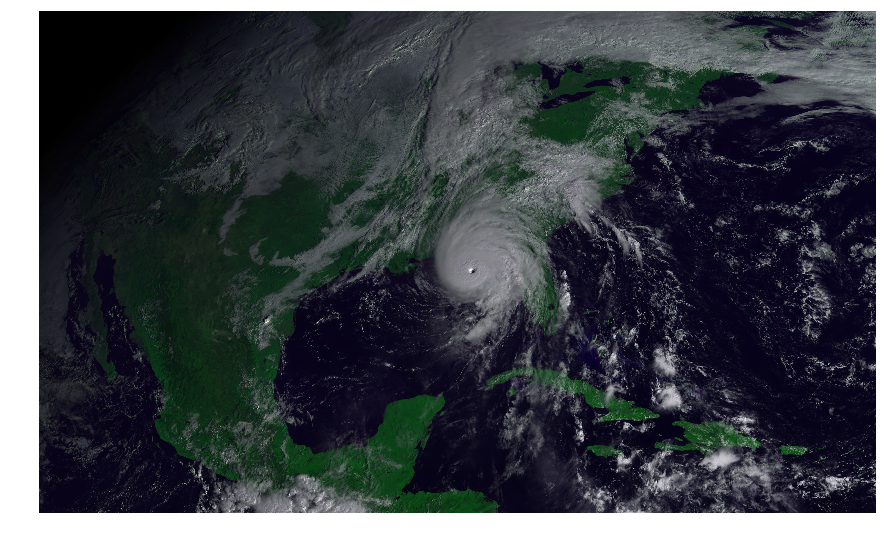

In [134]:
R = np.load('./data/GOES_ABI_20181010-1438_C02.npy').item()
G = np.load('./data/GOES_ABI_20181010-1438_C03.npy').item()
B = np.load('./data/GOES_ABI_20181010-1438_C01.npy').item()

print('R:', R['long name'], R['wavelength'], 'um', '\tUnits:', R['units'])
print('G:', G['long name'], G['wavelength'], 'um', '\tUnits:', G['units'])
print('B:', B['long name'], B['wavelength'], 'um', '\tUnits:', B['units'])

RGB = np.dstack([R['data'], G['data'], B['data']])

plt.figure(figsize=(15,10))
plt.imshow(RGB)

plt.axis('off');

In [135]:
# Apply a gammer correction, by scaling the RGB values by a power of 0.4
RGB = np.dstack([R['data'], G['data'], B['data']])**.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


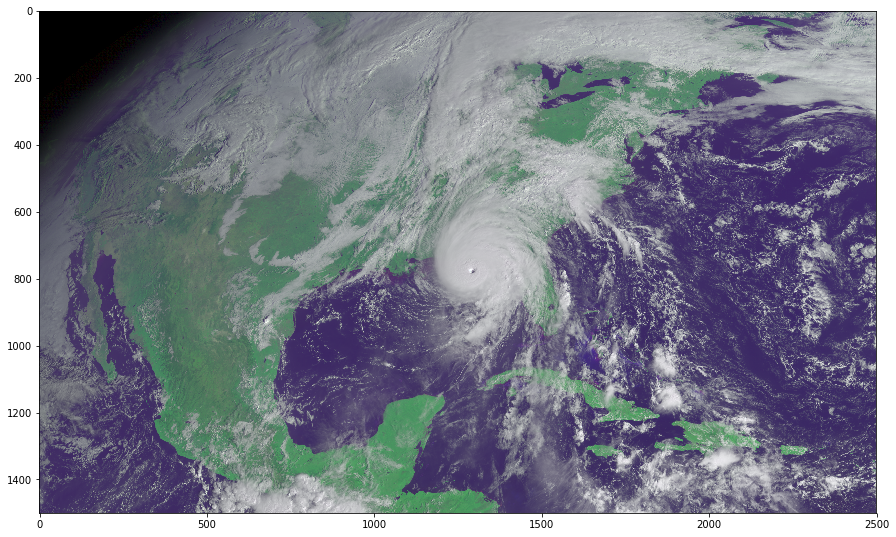

In [136]:
plt.figure(figsize=(15,10))
plt.imshow(RGB)

The green channel actually doesn't measure "Green" light, rather, it measures a wavelenth that is senstive to vegetation.

It is common to simulate the "true green" color with a simple interpolaiton. (See recipe: http://cimss.ssec.wisc.edu/goes/OCLOFactSheetPDFs/ABIQuickGuide_CIMSSRGB_v2.pdf)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in maximum
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in minimum
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


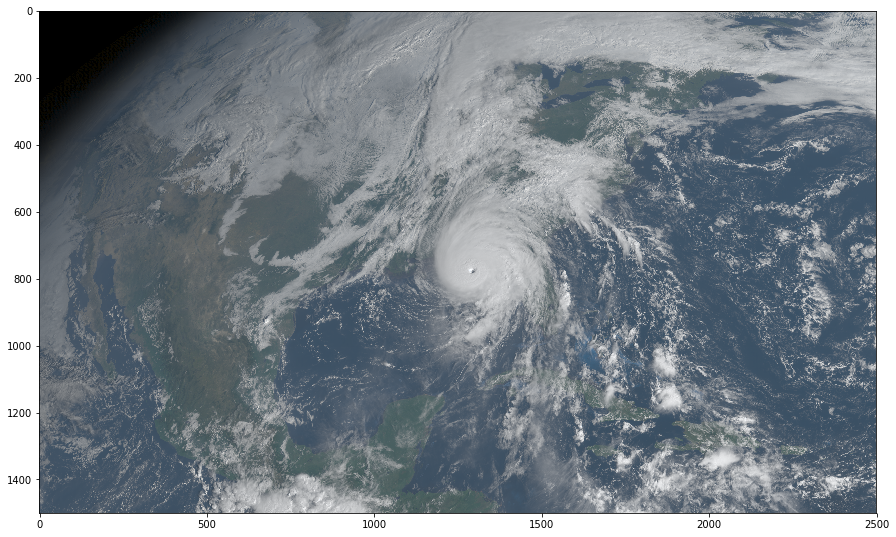

In [137]:
true_G = 0.45 * R['data'] + 0.45 * B['data'] + 0.1 * G['data']
true_G = np.maximum(true_G, 0)
true_G = np.minimum(true_G, 1)

RGB_veggie = np.dstack([R['data'], true_G, B['data']])**.4

plt.figure(figsize=(15,10))
plt.imshow(RGB_veggie)


# Plot All Channels

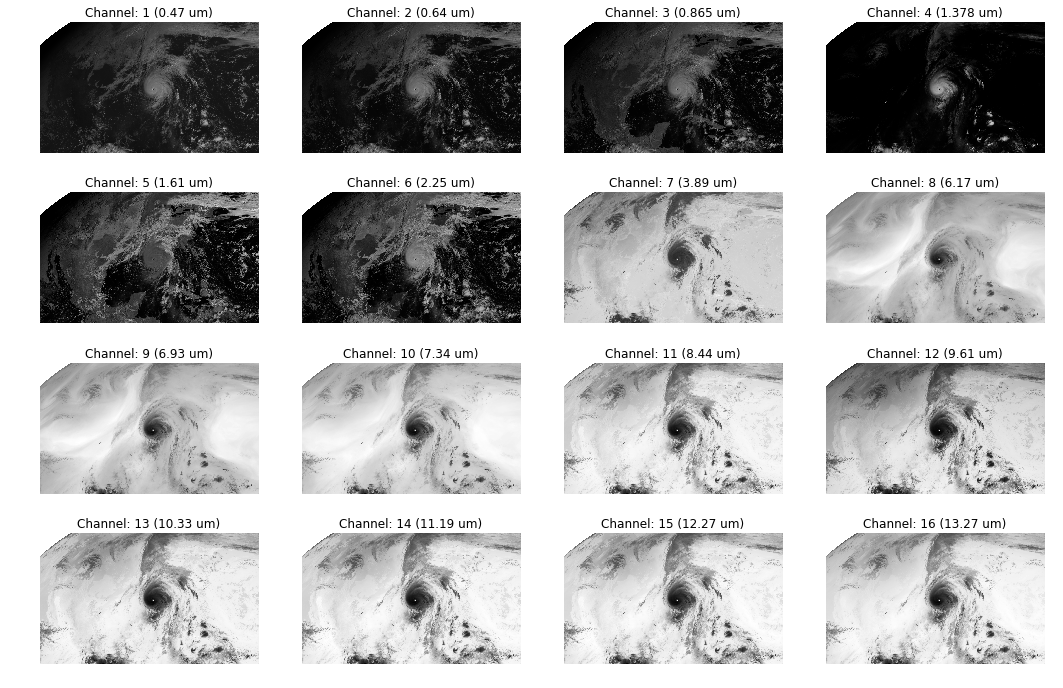

In [252]:
fig, axes = plt.subplots(4,4, figsize=(18,12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    channel = np.load('./data/GOES_ABI_20181010-1438_C%02d.npy' % (i+1)).item()
    ax.imshow(channel['data'], cmap='gray')
    ax.set_title('Channel: %s (%s um)' % (i+1,channel['wavelength']))
    ax.axis('off')

# Extra Practice: Advanced GOES-16 RGB Composites

Can you follow the RGB recipe to create the day convection RGB product?

http://rammb.cira.colostate.edu/training/visit/quick_guides/QuickGuide_GOESR_DayConvectionRGB_final.pdf

Look at the [ABI bands quick guides](https://www.goes-r.gov/education/ABI-bands-quick-info.html) to see which channel corresponds to each wavelength in the recipe.

Notice that the units of these channels are in Kelvin (the difference between two Kelvin values is the same as Celsius), but _RGB values must be between 0 and 1_. To fix this, we normalize the channel differences by the max/min range as instructed in the recipe (https://stats.stackexchange.com/a/70807/220885).
    
    normalized_value = (value-minimum)/(maximum-minimum)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 2499.5, 1499.5, -0.5)

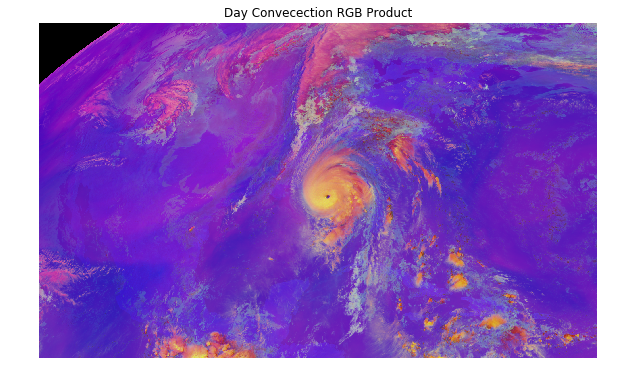

In [144]:
# Load the channel we need
C08 = np.load('./data/GOES_ABI_20181010-1438_C08.npy').item()
C10 = np.load('./data/GOES_ABI_20181010-1438_C10.npy').item()
C07 = np.load('./data/GOES_ABI_20181010-1438_C07.npy').item()
C13 = np.load('./data/GOES_ABI_20181010-1438_C13.npy').item()
C05 = np.load('./data/GOES_ABI_20181010-1438_C05.npy').item()
C02 = np.load('./data/GOES_ABI_20181010-1438_C02.npy').item()

R_c = C08['data']-C10['data']
G_c = C07['data']-C13['data']
B_c = C05['data']-C02['data']

# Normalize values of each channel. RGB values must be between 0 and 1, scalled according to the recipe.
# Normalize values between 0 and 1: normalized_value = (value-minimum)/(maximum-minimum)
# https://stats.stackexchange.com/a/70807/220885
R_c = (R_c-(-35))/(5-(-35))
G_c = (G_c-(-5))/(60-(-5))
B_c = (B_c-(-.75))/(.25-(-.75))

RGB_convective = np.dstack([R_c, G_c, B_c])

plt.figure(figsize=[10,7])
plt.imshow(RGB_convective)
plt.title('Day Convecection RGB Product')
plt.axis('off')

# HRRR Dataset

In [331]:
TMP = np.load('./data/HRRR_F00_20181010-1400_TMP-2-m.npy').item()

In [334]:
TMP.keys()

dict_keys(['value', 'lat', 'lon', 'valid', 'anlys', 'msg', 'name', 'units', 'level', 'URL'])

In [337]:
TMP['units']

'K'

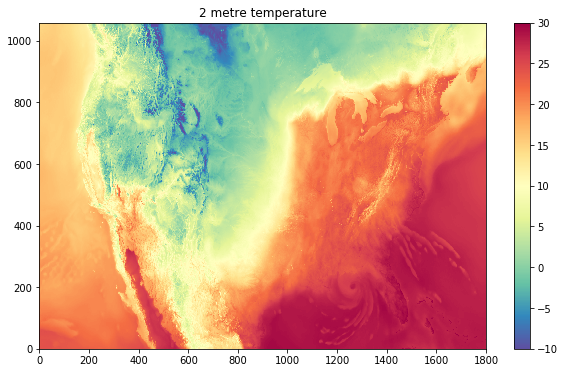

In [380]:
plt.figure(figsize=[10,6])
plt.pcolormesh(TMP['value']-273.15, cmap='Spectral_r', vmax=30, vmin=-10)
plt.title(TMP['name'])
plt.colorbar()

In [381]:
REFC = np.load('./data/HRRR_F00_20181010-1400_REFC-entire.npy').item()

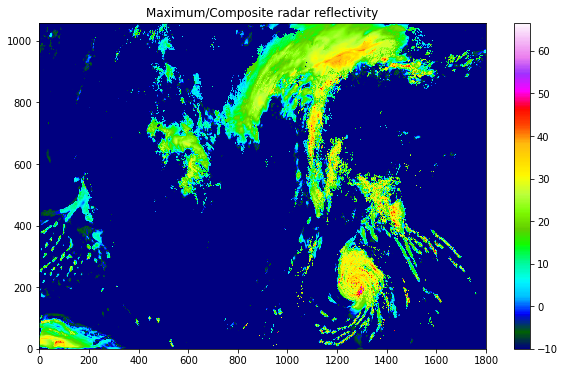

In [382]:
plt.figure(figsize=[10,6])
plt.pcolormesh(REFC['value'], cmap='gist_ncar')
plt.title(REFC['name'])
plt.colorbar()

In [383]:
LAND = np.load('./data/HRRR_F00_20181010-1400_LAND-WATER.npy').item()
HGT500 = np.load('./data/HRRR_F00_20181010-1400_HGT-500-mb.npy').item()

Text(0,1,'500 hPa Geopotential Height')

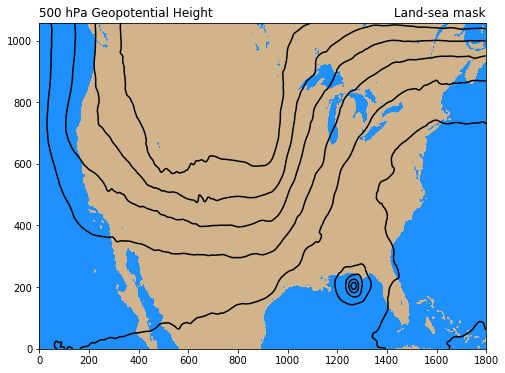

In [386]:
plt.figure(figsize=[8,6])
plt.contourf(LAND['value'], levels=[0,.5,1], colors=['dodgerblue','tan'])
plt.title(LAND['name'], loc='right')

plt.contour(HGT500['value'], colors='k')
plt.title('500 hPa ' + HGT500['name'], loc='left')

<br>
<br><br>
<br>

# The below stuff is just for reference.

---

### How the individual GOES16 files were created...
This will not work on the Library computers becuase `xarray` and `netcdf4` readers are not installed.

In [96]:
import xarray
from datetime import datetime

In [90]:
ABI = xarray.open_dataset('./data/OR_ABI-L2-MCMIPC-M3_G16_s20182831437203_e20182831439576_c20182831440087.nc')

In [120]:
for channel in range(1,17):
    
    DATE = str(ABI['t'].data)[:-10]
    DATE = datetime.strptime(DATE, '%Y-%m-%dT%H:%M:%S')

    save_this = {'wavelength': ABI['band_wavelength_C%02d' % channel].data[0],
                 'data': ABI['CMI_C%02d' % channel].data[:],
                 'units': ABI['CMI_C%02d' % channel].units,
                 'long name': ABI['CMI_C%02d' % channel].long_name,
                 'standard name': ABI['CMI_C%02d' % channel].standard_name,
                 'DATE': str(DATE)}
    
    np.save('./data/GOES_ABI_%s_C%02d.npy' % (DATE.strftime('%Y%m%d-%H%M'), channel), save_this)

In [146]:
ABI.nominal_satellite_height

<xarray.DataArray 'nominal_satellite_height' ()>
array(35786.023438)
Coordinates:
    t        datetime64[ns] 2018-10-10T14:38:38.980061952
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:      nominal satellite height above GRS 80 ellipsoid (platform...
    standard_name:  height_above_reference_ellipsoid
    units:          km

## GOES-16 Wavelengths


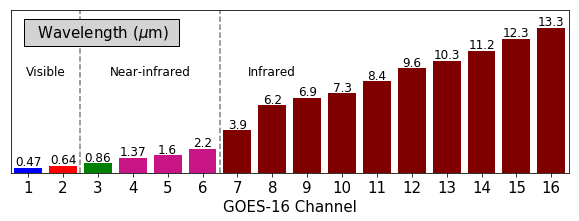

In [230]:
# Wavelengths
W = [0.47, 0.64, 0.86, 1.37, 1.6, 2.2, 3.9, 6.2, 6.9, 7.3, 8.4, 9.6, 10.3, 11.2, 12.3, 13.3]
# Channels
C = range(1,17)
# Representative colors
colors = ['b', 'r', 'g', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon']

plt.figure(figsize=[10,3])

plt.bar(C, W, color=colors)
for i, w in enumerate(W):
    plt.text(i+1, w+.25, w, horizontalalignment='center', fontsize=12)
plt.xticks(C, fontsize=15);
plt.xlabel('GOES-16 Channel', fontsize=15)
plt.yticks([]);
plt.xlim([.5,16.5])
plt.ylim([0,15]);


t = plt.text(1, 12.5, r'  Wavelength ($\mu$m)  ', fontsize=15);
t.set_bbox(dict(facecolor='lightgrey'))

plt.axvline(2.5, linestyle='--', color='grey')
plt.axvline(6.5, linestyle='--', color='grey')
plt.text(1.5, 9, r'Visible', fontsize=12, horizontalalignment='center');
plt.text(4.5, 9, r'Near-infrared', fontsize=12, horizontalalignment='center');
plt.text(8, 9, r'Infrared', fontsize=12, horizontalalignment='center');

plt.savefig('./images/GOES-wavelengths.png', dpi=100, bbox_inches='tight')